# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv('bwHiI8BaXTCixSfbwX5Ja2PQnU63W8.csv')
print(df.shape)

(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [60]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
print(df.shape)

(891, 9)


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [61]:
df['Deck'] = df['Cabin'].str[0]
df = df.drop(columns=['Cabin'])
print(df['Deck'].unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [62]:
categorical_columns = ['Sex', 'Embarked', 'Deck']
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [63]:
continuous_vars = ['Age', 'Fare']
categorical_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Deck']

for col in continuous_vars:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_vars:
    mode_value = df[col].mode()
    if len(mode_value) > 0:
        df[col] = df[col].fillna(mode_value[0])

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [64]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [65]:
df.to_csv('titanic_processed.csv', index=False)

import json
records = df.to_dict('records')
with open('titanic_processed.json', 'w') as f:
    json.dump(records, f, indent=2)

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [66]:
categorical_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived', 'Embarked', 'Deck']
numerical_vars = ['Age', 'Fare']

modes = {}
for col in categorical_vars:
    modes[col] = df[col].mode()[0]
    
medians = {}
for col in numerical_vars:
    medians[col] = df[col].median()

print("Modes of categorical variables:")
for k, v in modes.items():
    print(f"{k}: {v}")
    
print("\nMedians of numerical variables:")
for k, v in medians.items():
    print(f"{k}: {v}")

Modes of categorical variables:
Pclass: 3
Sex: 1
SibSp: 0
Parch: 0
Survived: 0
Embarked: 2
Deck: -1

Medians of numerical variables:
Age: 29.69911764705882
Fare: 14.4542


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [67]:
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

average_survivor = {}
for col in categorical_vars:
    if col != 'Survived':
        average_survivor[col] = survivors[col].mode()[0]
for col in numerical_vars:
    average_survivor[col] = survivors[col].median()
average_survivor['Survived'] = 1

average_non_survivor = {}
for col in categorical_vars:
    if col != 'Survived':
        average_non_survivor[col] = non_survivors[col].mode()[0]
for col in numerical_vars:
    average_non_survivor[col] = non_survivors[col].median()
average_non_survivor['Survived'] = 0

print("Average Survivor:")
print(average_survivor)
print("\nAverage Non-Survivor:")
print(average_non_survivor)

Average Survivor:
{'Pclass': np.int64(1), 'Sex': np.int8(0), 'SibSp': np.int64(0), 'Parch': np.int64(0), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Age': np.float64(29.69911764705882), 'Fare': np.float64(26.0), 'Survived': 1}

Average Non-Survivor:
{'Pclass': np.int64(3), 'Sex': np.int8(1), 'SibSp': np.int64(0), 'Parch': np.int64(0), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Age': np.float64(29.69911764705882), 'Fare': np.float64(10.5), 'Survived': 0}


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

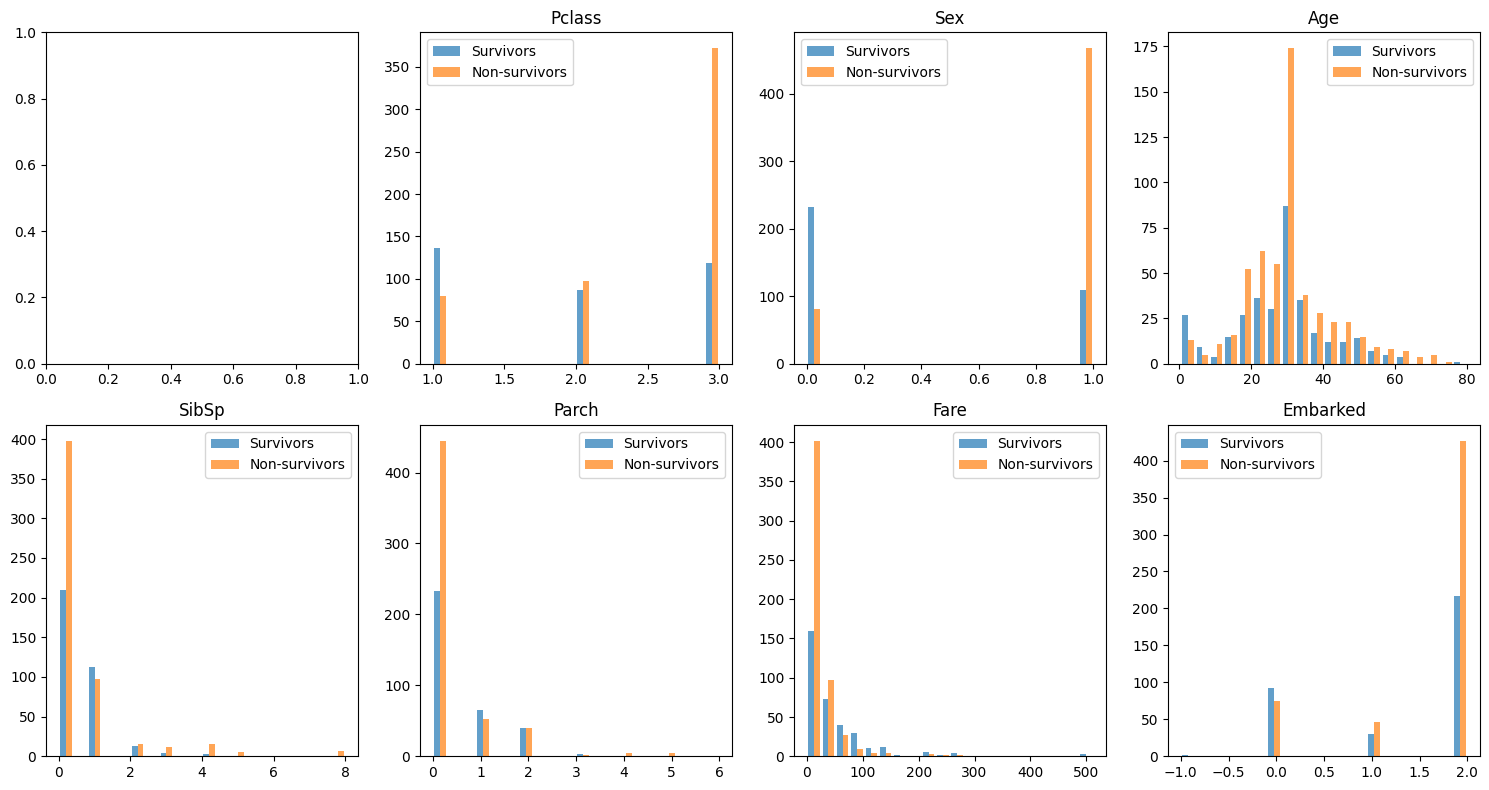

Passengers most similar to average survivor: [507, 53, 133, 801, 426]
Passengers most similar to average non-survivor: [868, 219, 242, 713, 439]
Survivors similar to average non-survivor: [286, 81, 79]
Non-survivors similar to average survivor: [168, 284, 637]


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    if col != 'Survived' and idx < 8:
        axes[idx].hist([survivors[col].dropna(), non_survivors[col].dropna()], 
                      label=['Survivors', 'Non-survivors'], alpha=0.7, bins=20)
        axes[idx].set_title(col)
        axes[idx].legend()
        
plt.tight_layout()
plt.show()

def find_similar_passengers(target, data, n=5):
    distances = []
    for idx, row in data.iterrows():
        dist = 0
        for col in data.columns:
            if col != 'Survived':
                dist += (row[col] - target[col]) ** 2
        distances.append((idx, dist))
    distances.sort(key=lambda x: x[1])
    return [d[0] for d in distances[:n]]

similar_to_avg_survivor = find_similar_passengers(average_survivor, survivors)
similar_to_avg_non_survivor = find_similar_passengers(average_non_survivor, non_survivors)

print(f"Passengers most similar to average survivor: {similar_to_avg_survivor}")
print(f"Passengers most similar to average non-survivor: {similar_to_avg_non_survivor}")

survivor_like_non_survivor = find_similar_passengers(average_non_survivor, survivors, n=3)
non_survivor_like_survivor = find_similar_passengers(average_survivor, non_survivors, n=3)

print(f"Survivors similar to average non-survivor: {survivor_like_non_survivor}")
print(f"Non-survivors similar to average survivor: {non_survivor_like_survivor}")

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

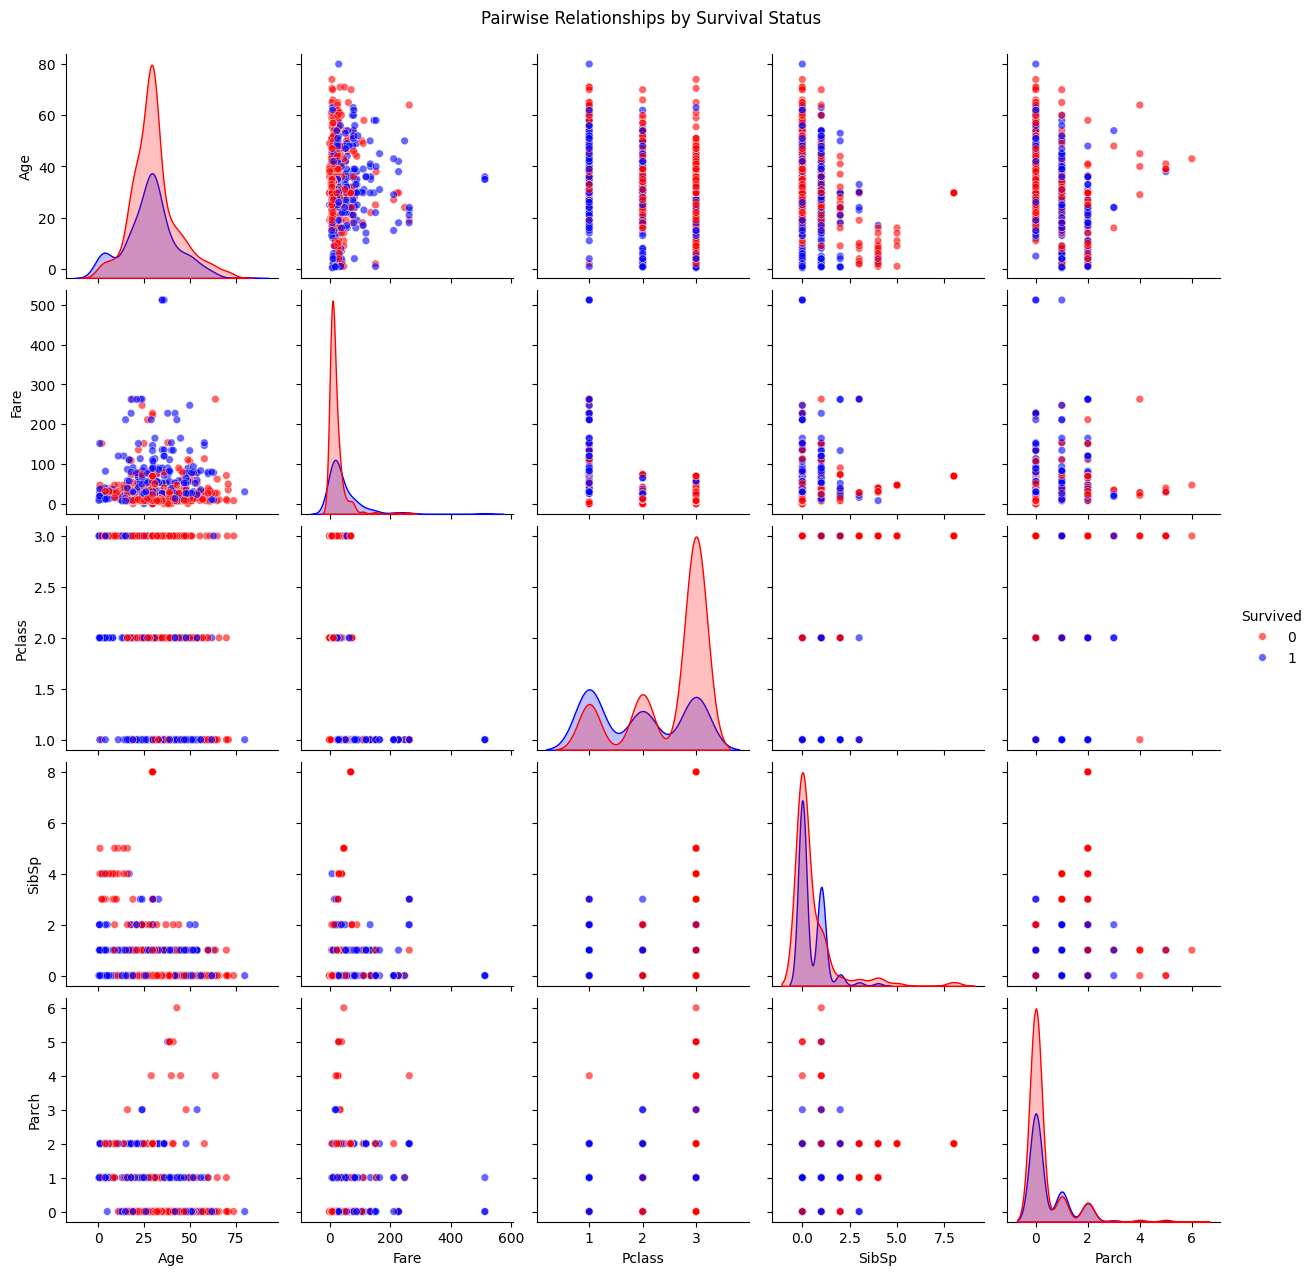

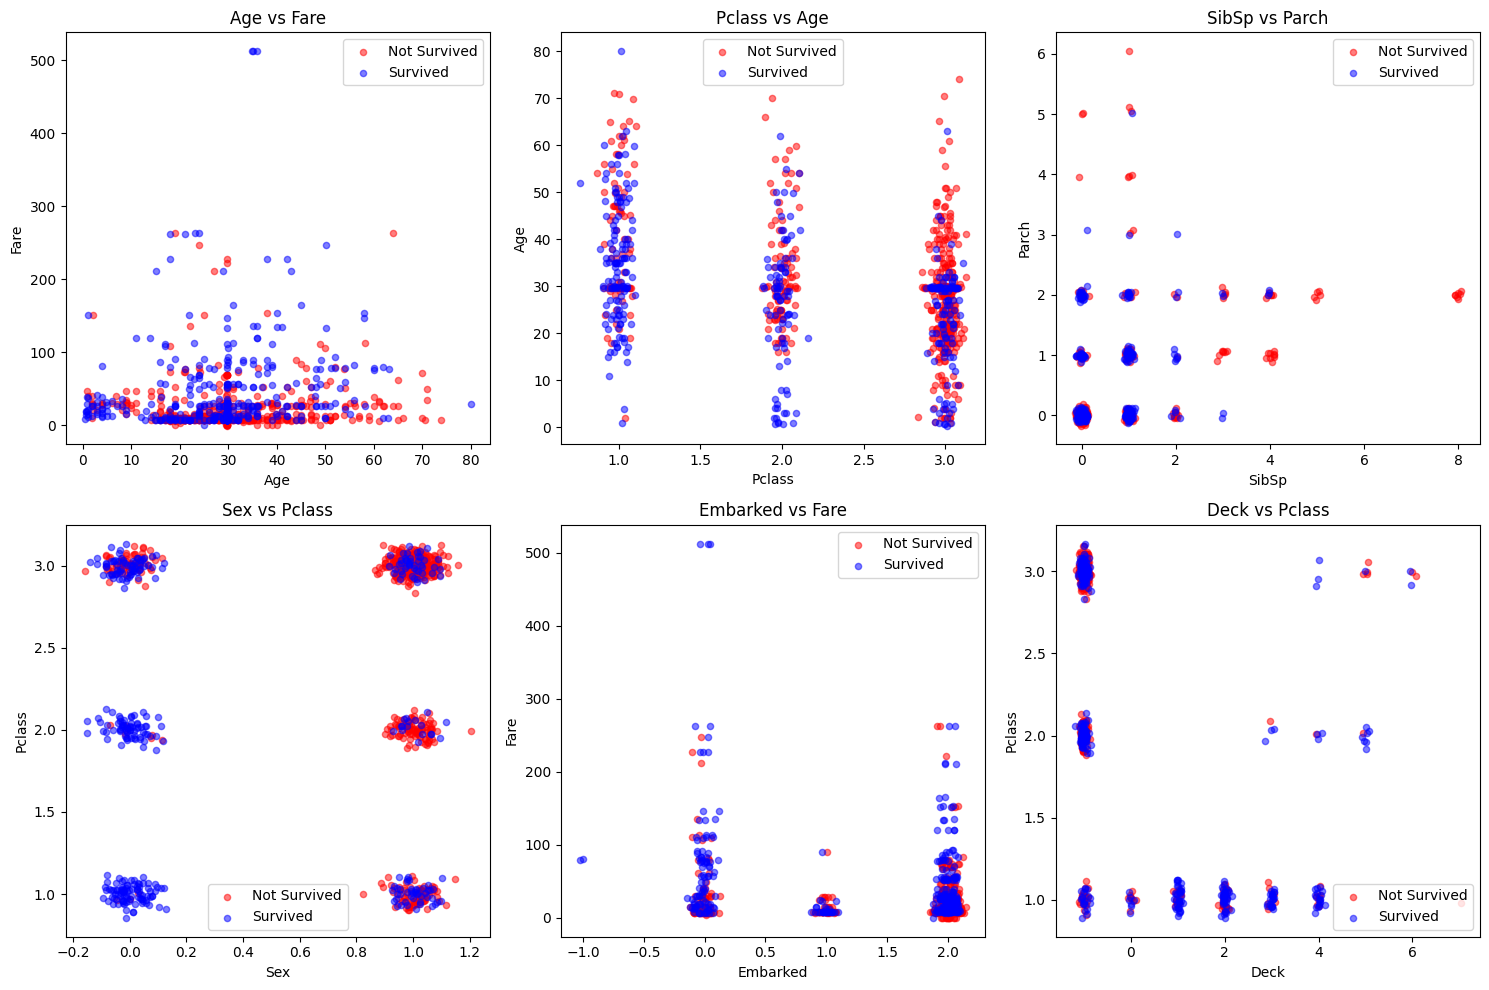

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
plot_df = df[numerical_features + ['Survived']].copy()

g = sns.pairplot(plot_df, hue='Survived', diag_kind='kde', 
                 plot_kws={'alpha': 0.6, 's': 30}, 
                 palette={0: 'red', 1: 'blue'})
g.fig.suptitle('Pairwise Relationships by Survival Status', y=1.02)
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

pairs = [('Age', 'Fare'), ('Pclass', 'Age'), ('SibSp', 'Parch'), 
         ('Sex', 'Pclass'), ('Embarked', 'Fare'), ('Deck', 'Pclass')]

for idx, (x_col, y_col) in enumerate(pairs):
    if idx < len(axes):
        for survived in [0, 1]:
            subset = df[df['Survived'] == survived]
            label = 'Survived' if survived else 'Not Survived'
            color = 'blue' if survived else 'red'
            
            x_jitter = subset[x_col] + np.random.normal(0, 0.05, len(subset))
            y_jitter = subset[y_col] + np.random.normal(0, 0.05, len(subset))
            
            axes[idx].scatter(x_jitter, y_jitter, alpha=0.5, label=label, 
                            color=color, s=20)
        
        axes[idx].set_xlabel(x_col)
        axes[idx].set_ylabel(y_col)
        axes[idx].set_title(f'{x_col} vs {y_col}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

Using mean and mode imputation for missing values has several effects:

1. **Preserves dataset size**: Instead of removing rows with missing data, we keep all 891 passengers, maintaining statistical power for analysis.

2. **Introduces bias**: Mean/mode imputation assumes missing values follow the same distribution as observed values, which may not be true. For example, missing cabin data might correlate with lower passenger class.

3. **Reduces variance**: Imputing with central tendency measures artificially reduces the variance of the affected variables, making the data appear more homogeneous than it actually is.

4. **Maintains relationships**: While not perfect, this approach preserves some relationships between variables better than deletion would, though it may weaken true correlations.

5. **Practical trade-off**: For the Titanic dataset, where missing cabin data affects ~77% of records, deletion would severely limit our analysis. The imputation strategy allows us to proceed with modeling while acknowledging its limitations.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [70]:
from collections import Counter
import re

with open('pos.txt', 'r', encoding='utf-8') as f:
    pos_text = f.read()
with open('neg.txt', 'r', encoding='utf-8') as f:
    neg_text = f.read()

def get_words(text):
    text = text.lower()
    words = re.findall(r'\b[a-z]+\b', text)
    return words

pos_words = get_words(pos_text)
neg_words = get_words(neg_text)

pos_counter = Counter(pos_words)
neg_counter = Counter(neg_words)

print("Top 20 most common words in positive reviews:")
for word, count in pos_counter.most_common(20):
    print(f"{word}: {count}")

print("\nTop 20 most common words in negative reviews:")
for word, count in neg_counter.most_common(20):
    print(f"{word}: {count}")

Top 20 most common words in positive reviews:
great: 435906
work: 427780
use: 345233
good: 291448
fit: 273505
instal: 229408
product: 210084
look: 181401
just: 180420
like: 175725
easi: 162864
light: 147321
car: 147195
price: 144891
need: 136519
perfect: 124405
time: 123938
replac: 122261
qualiti: 119732
nice: 119314

Top 20 most common words in negative reviews:
work: 39998
use: 37244
fit: 31293
product: 24394
just: 23580
light: 22907
like: 20685
time: 19665
look: 18824
instal: 18709
did: 18446
good: 17295
dont: 17136
buy: 16885
car: 16694
return: 15227
tri: 14957
doe: 14201
replac: 13509
didnt: 13045


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [pos_text, neg_text]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of unique words: {len(feature_names)}")

TF-IDF matrix shape: (2, 235581)
Number of unique words: 235581


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [72]:
pos_tfidf_scores = tfidf_matrix[0].toarray().flatten()
neg_tfidf_scores = tfidf_matrix[1].toarray().flatten()

pos_word_scores = [(feature_names[i], pos_tfidf_scores[i]) for i in range(len(feature_names))]
neg_word_scores = [(feature_names[i], neg_tfidf_scores[i]) for i in range(len(feature_names))]

pos_word_scores.sort(key=lambda x: x[1], reverse=True)
neg_word_scores.sort(key=lambda x: x[1], reverse=True)

print("Top 20 words with highest TF-IDF scores in positive reviews:")
for word, score in pos_word_scores[:20]:
    print(f"{word}: {score:.4f}")

print("\nTop 20 words with highest TF-IDF scores in negative reviews:")
for word, score in neg_word_scores[:20]:
    print(f"{word}: {score:.4f}")

print("\nComparison:")
print("Most common words are generally stop words and generic terms.")
print("TF-IDF identifies more distinctive words specific to each class.")

Top 20 words with highest TF-IDF scores in positive reviews:
great: 0.3668
work: 0.3599
use: 0.2905
good: 0.2452
fit: 0.2301
instal: 0.1930
product: 0.1768
look: 0.1526
just: 0.1518
like: 0.1479
easi: 0.1370
light: 0.1240
car: 0.1239
price: 0.1219
need: 0.1149
perfect: 0.1047
time: 0.1043
replac: 0.1029
qualiti: 0.1007
nice: 0.1004

Top 20 words with highest TF-IDF scores in negative reviews:
work: 0.3018
use: 0.2810
fit: 0.2361
product: 0.1841
just: 0.1779
light: 0.1728
like: 0.1561
time: 0.1484
look: 0.1420
instal: 0.1412
did: 0.1392
good: 0.1305
dont: 0.1293
buy: 0.1274
car: 0.1260
return: 0.1149
tri: 0.1129
doe: 0.1072
replac: 0.1019
didnt: 0.0984

Comparison:
Most common words are generally stop words and generic terms.
TF-IDF identifies more distinctive words specific to each class.


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

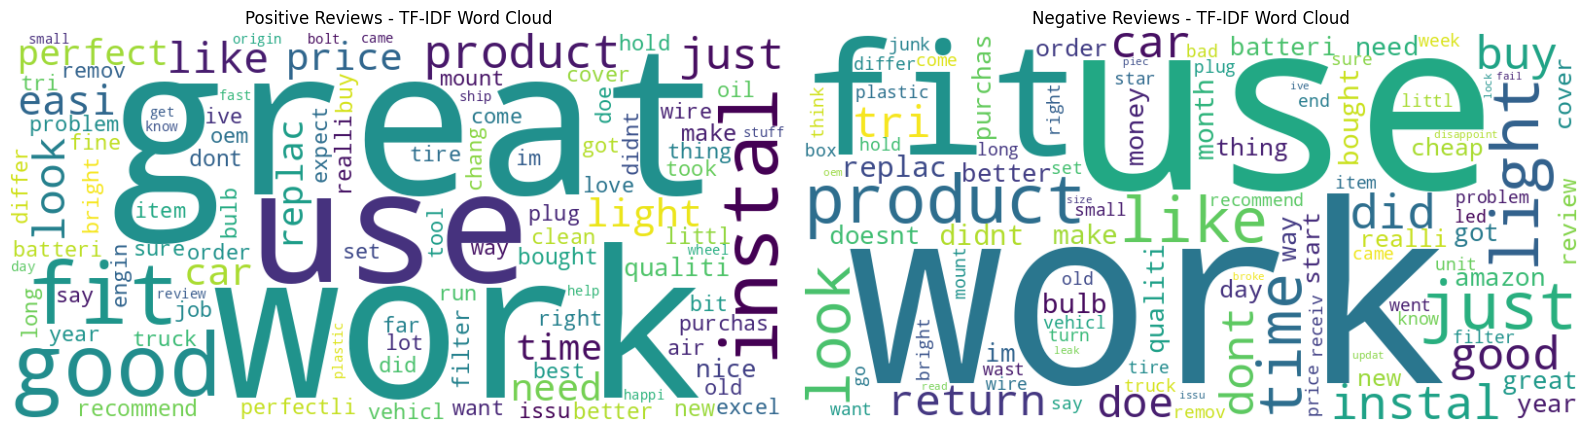

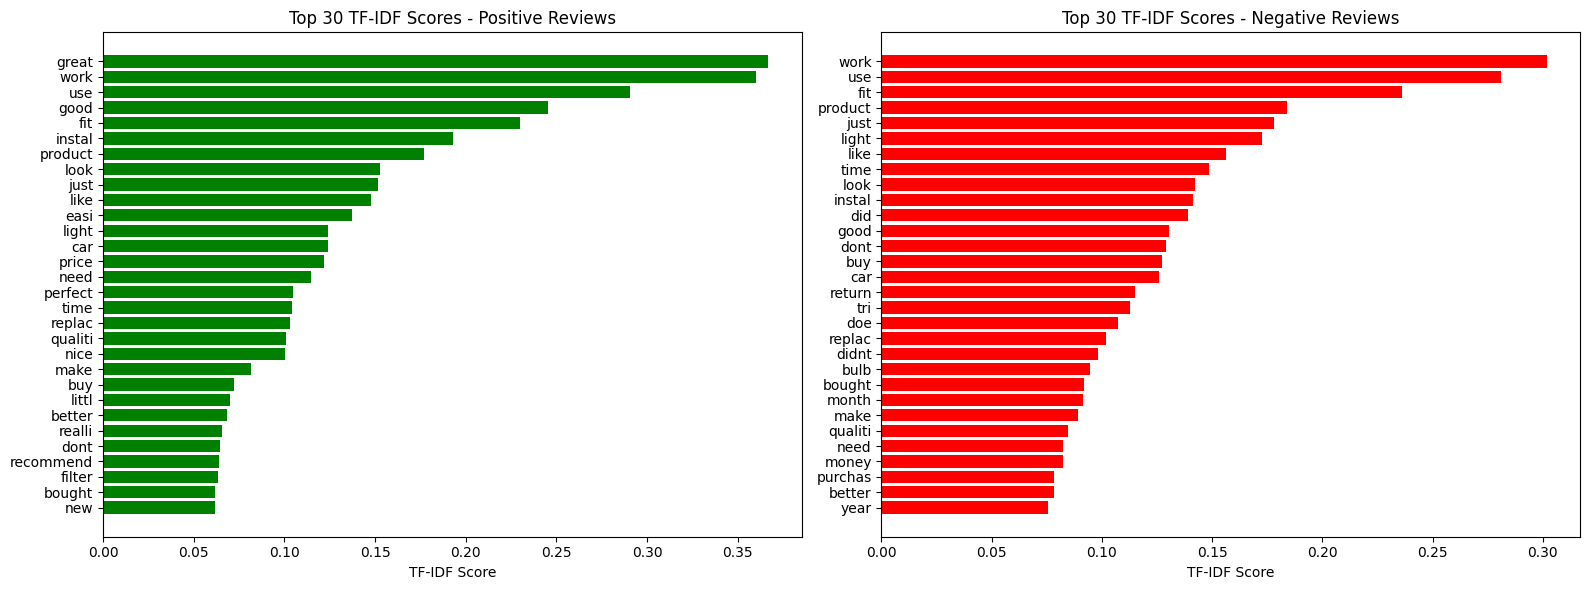

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_top_words = dict(pos_word_scores[:100])
neg_top_words = dict(neg_word_scores[:100])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_top_words)
axes[0].imshow(pos_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Reviews - TF-IDF Word Cloud')
axes[0].axis('off')

neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neg_top_words)
axes[1].imshow(neg_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Reviews - TF-IDF Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_n = 30
pos_top = pos_word_scores[:top_n]
neg_top = neg_word_scores[:top_n]

axes[0].barh([w[0] for w in pos_top][::-1], [w[1] for w in pos_top][::-1], color='green')
axes[0].set_title('Top 30 TF-IDF Scores - Positive Reviews')
axes[0].set_xlabel('TF-IDF Score')

axes[1].barh([w[0] for w in neg_top][::-1], [w[1] for w in neg_top][::-1], color='red')
axes[1].set_title('Top 30 TF-IDF Scores - Negative Reviews')
axes[1].set_xlabel('TF-IDF Score')

plt.tight_layout()
plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**